### K-means clustering

In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#criando o DataFrame "df_chem"
df = pd.read_csv("Minerals_Database3.csv")  # Importação do dataset para ser utilizado como dataframe
# Remoção de colunas não necessárias para o dataframe

df = df.drop(['A'], axis=1)
df = df.drop(['Name'], axis=1)

dados_cat = df.reindex(df.columns[[0,2,4]], axis = 1) # Remoção de dados categóricos
dados_categoricos = dados_cat.astype("category") # Tratamento de dados para o tipo categórico
newlist = [x for x in range(7,135)] # Range para pegarmos dados que estão em porcentagem
porcent_df = df.reindex(df.columns[newlist], axis = 1) # Coleta dos dados de elementos em porcentagem
df_chem = df.reindex(df.columns[[1,3,5,135,136,137]], axis=1) # Reindexação de um dataframe contendo apenas propriedades fisico-químicas
df_chem
df_chem, dados_categoricos

df_remove=df_chem.loc[(df_chem["Refractive Index"] == 0.000)] #remove as linhas (objetos), cujo valor do índice de refração é 0

df_chem = df_chem.drop(df_remove.index) #considera que o dataframe df_chem é o dataframe com as linhas removidas
print(df_chem)

     Mohs Hardness  Specific Gravity  Refractive Index  Molar Mass  \
0             4.50             3.240             1.580  817.339002   
1             2.75             3.446             1.592  435.069330   
2             2.00             4.420             2.085  921.092220   
4             5.50             1.050             1.634  861.185368   
5             3.50             3.295             1.457  225.618151   
..             ...               ...               ...         ...   
803           7.50             4.650             1.928  526.041800   
805           6.50             3.230             1.702  379.378178   
806           3.50             2.180             1.590  492.887716   
807           7.00             3.411             1.596  263.580584   
808           0.00             3.146             1.633  576.801907   

     Molar Volume  Calculated Density  
0        0.123390               5.498  
1        0.056083               6.439  
2        0.122631               6.234  

In [2]:
nome = 'df_chem' #escolha do dataset
atributos = ["Specific Gravity", "Mohs Hardness", 'Molar Mass', 'Molar Volume', 'Calculated Density'] #atributos
#target = ["Refractive Index"] comentado pois é não supervisionado
df_chem_r = df_chem.reindex(atributos, axis=1) #df_chem reindexado


### Normalização do Dataset

In [3]:
sc = StandardScaler()
sc.fit(df_chem_r) #fit
df_chem_r_norma = sc.transform(df_chem_r) #normalização

### Fit K-Means

In [4]:
n_clusters=5  #Define cinco clusters pois os dados estão esparços

k_means = KMeans(            #Inicializando o K-Means
    n_clusters=n_clusters,  #Definindo número de clusters
    init='random',          #Inicialização randomica, aqui você pode tentar o K-Means++ :)
    n_init=10,              #Número de inicializações
    max_iter=300,           #Número máximo de iterações
    tol=1e-04,              #Tolerância para variação da coordenada dos centróides para definir a convergência
    random_state=0          #Define a semente aleatória
)

y_k_means = k_means.fit_predict(df_chem_r_norma) #Fita o K-Means

### Plot K-Means

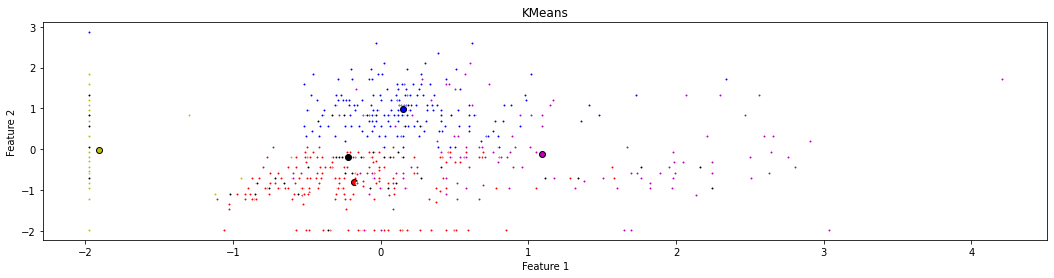

In [5]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

centroids = k_means.cluster_centers_ #Extraindo os centróides do K-Means
labels = pairwise_distances_argmin(df_chem_r_norma, centroids) #Usando a função pairwise_distances_argmin 
                                                      #para dar os labels aos clusters
colors = ["r", "m", "b", "y", "k"] #Definindo a paleta de cores

fig = plt.figure(figsize=(18, 4)) #Definindo a figura e seu tamanho
ax = fig.add_subplot()             #Criando um subplot

for k, col in zip(range(n_clusters), colors): #Desempacotando a lista de número de cluster e cores.
    my_members = labels == k  #Define quais pontos são membros de cada cluster
    #print(my_members)        #Descomente essa linha para entender como se comporta a variável my_members
    cluster_center = centroids[k] #Pega as coordenadas do centróide k
    ax.plot(                      #Plota os pontos do centróide k
        df_chem_r_norma[my_members, 0],    #Coordenada do eixo-x
        df_chem_r_norma[my_members, 1],    #Coordenada do eixo-y
        markerfacecolor=col,      #Define a cor do ponto
        marker=".",               #Define o estilo do ponto
        markeredgecolor="w",      #Define a cor de contorno do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )
    ax.plot(                      #Plotando os centróides
        cluster_center[0],        #Coordenada x do centróide
        cluster_center[1],        #Coordenada y do centróide
        marker="o",               #Define estilo do ponto
        markerfacecolor=col,      #Define cor do ponto
        markeredgecolor="k",      #Define a cor do contorno do ponto
        markersize=6,             #Define o tamanho do ponto
        linewidth=0               #Largura de linha zero, para não ligar os pontos
    )

ax.set_title("KMeans")  #Título do gráfico
plt.xlabel('Feature 1') #Nome da componente x
plt.ylabel('Feature 2') #Nome da componente y

plt.show() #Mostrar o gráfico

#### Para a regressão em PCA foram usados 3 componentes. Nota-se que há dados do K-Means negativos. Porvavelmente isso se deve pela normalização.

### PCA DataFrame normalizado

In [6]:
pca = PCA()
pca.fit(df_chem_r_norma) #fit PCA
df_chem_r_pca = pca.transform(df_chem_r_norma) #PCA com os dados normalizados

### Coloração Refractive Index

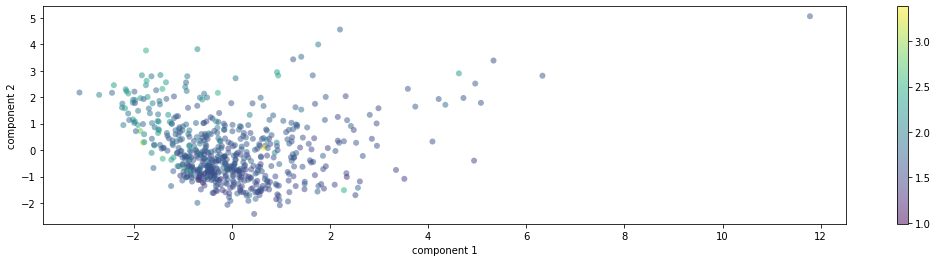

In [7]:
fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(df_chem_r_pca[:, 0], df_chem_r_pca[:, 1], edgecolor='none', alpha=0.5, c=df_chem["Refractive Index"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### Método do cotovelo/ombro

#### Usado para determinar quantos clusters parecem ser suficientes para o modelo, sem perda exagerada.

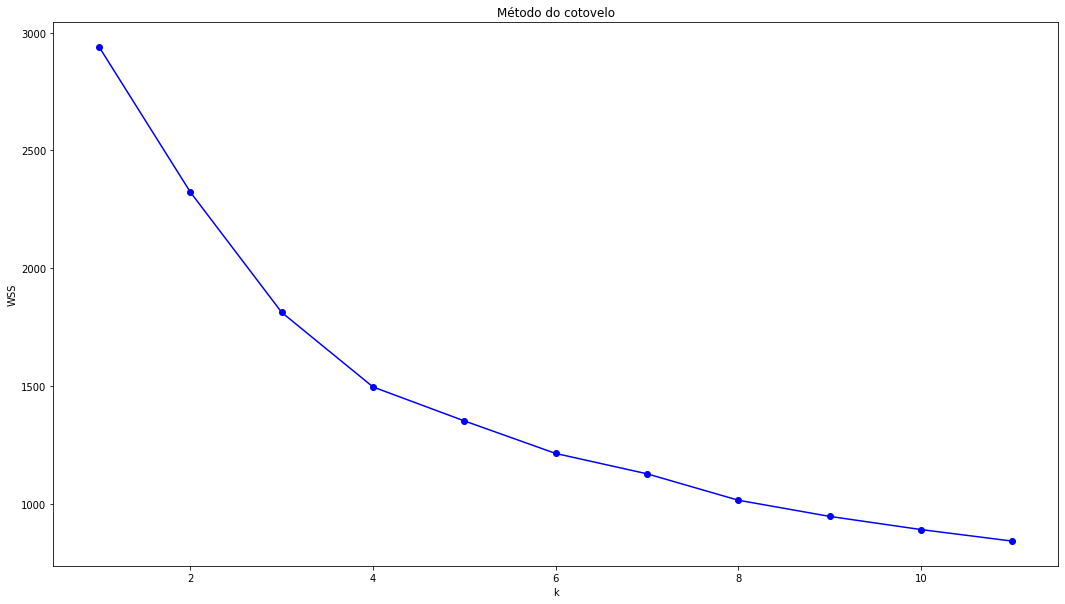

In [8]:
WSS = []  #Inicia uma lista vazia, para acumularmos valores.

for k in range(1, 12): #1 a 12 clusters
    k_means = KMeans(  #Inicializa o K-Means, como já explicado antes
        n_clusters=k, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=1024
    )
    y_kmeans = k_means.fit_predict(df_chem_r_pca) #Fita o K-Means em df_chem_r_pca
    WSS.append(k_means.inertia_)          #Obtem a WSS e acumula na lista inicializada 
    
plt.figure(figsize=(18,10))              #Define o tamanho da figura
plt.plot(range(1,12), WSS, '-bo')        #Define o plot, 1 a 12 clusters
plt.xlabel('k')                          #Nome da coordenada x
plt.ylabel('WSS')                        #Nome da coordenada y
plt.title('Método do cotovelo')          #Título do gráfico
plt.show()                               #Mostra o gráfico

#### Observando o gráfico, de 4 a 6 clusters parece ser o ideal para o modelo. Isso se deve pois esse parece ser o número que equilibra quantidade de dados x custo computacional. Assim, se pode representar os dados sem um custo muito grande computacional e sem grandes perdas.

### Teste de clusters

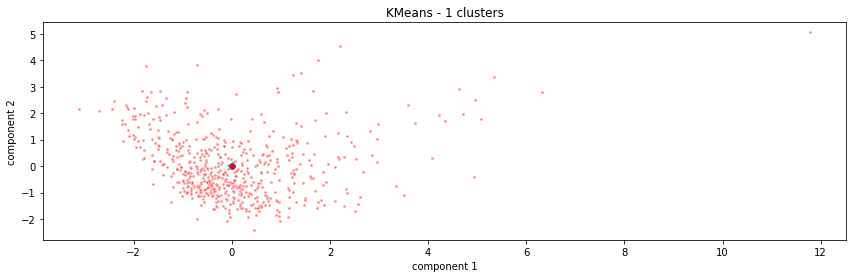

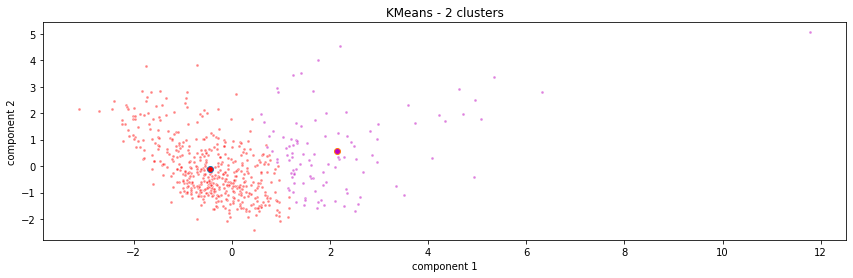

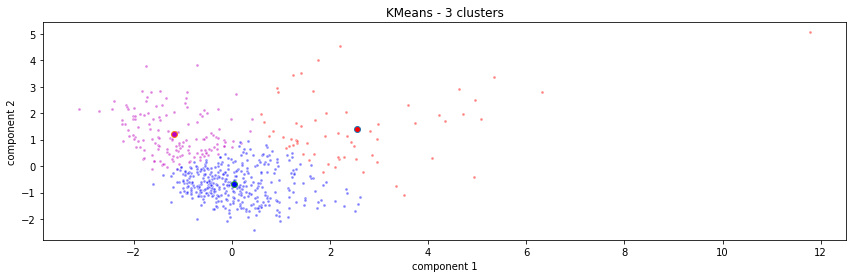

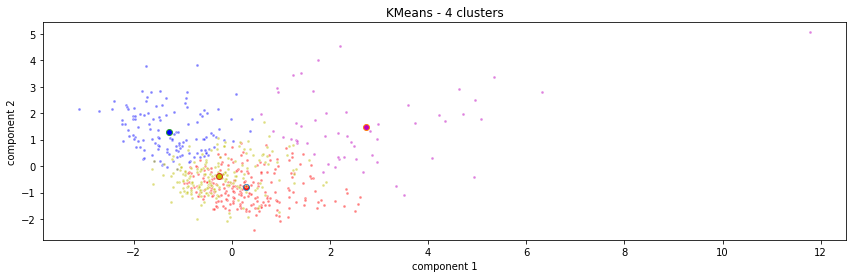

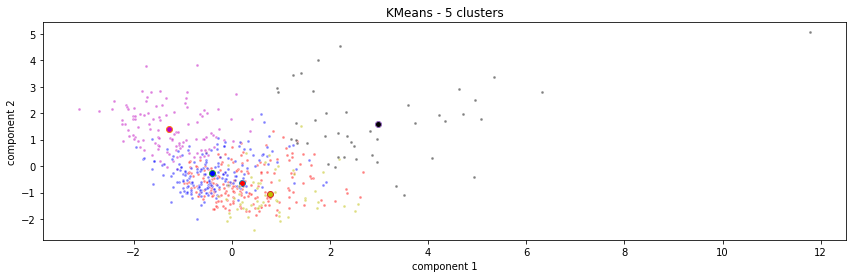

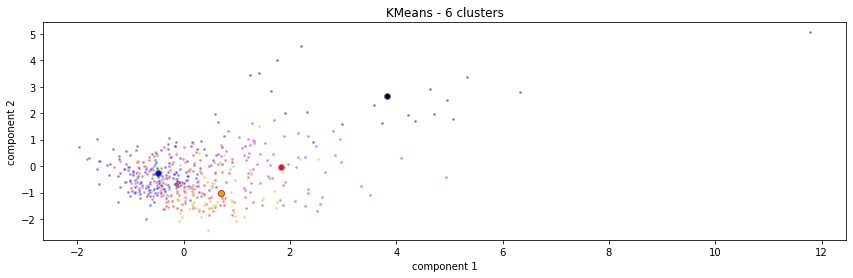

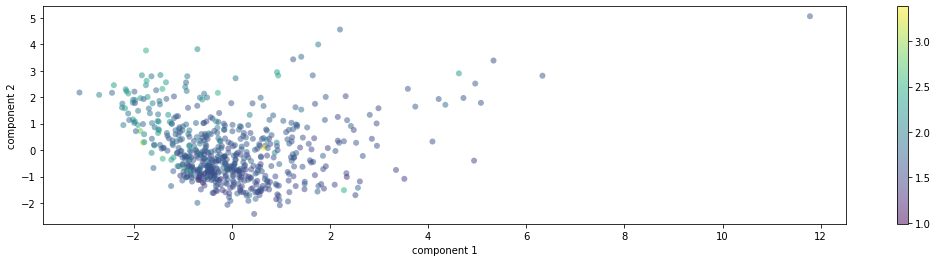

In [9]:
for numberofclusters in range(1,7):

    n_clusters=numberofclusters

    k_means = KMeans(
        n_clusters=n_clusters, 
        init='random',
        n_init=10, 
        max_iter=300, 
        tol=1e-04, 
        random_state=0
    )

    y_kmeans = k_means.fit_predict(df_chem_r_pca)

    centroids = k_means.cluster_centers_
    labels = pairwise_distances_argmin(df_chem_r_pca, centroids)
    colors = ["r", "m", "b", "y", "k"]

    fig = plt.figure(figsize=(14.4, 4))
    ax = fig.add_subplot()

    for k, col in zip(range(n_clusters), colors):
        my_members = labels == k
        cluster_center = centroids[k]
        ax.plot(
            df_chem_r_pca[my_members, 0],
            df_chem_r_pca[my_members, 1],
            "w", 
            markerfacecolor=col,
            marker=".",
            alpha = 0.5,
            linewidth=0)
        ax.plot(
            cluster_center[0],
            cluster_center[1],
            "o",
            markerfacecolor=col,
            markersize=6,
            alpha = 1.0,
            linewidth=0
        )
    title = 'KMeans - ' + str(numberofclusters) + " clusters"
    ax.set_title(title)
    plt.xlabel('component 1')
    plt.ylabel('component 2')

    plt.show()


fig = plt.figure(figsize=(18, 4))
ax = fig.add_subplot()

plt.scatter(df_chem_r_pca[:, 0], df_chem_r_pca[:, 1], edgecolor='none', alpha=0.5, c=df_chem["Refractive Index"].values)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

#### Pode ser observado que 4 parece ser o ideal, mesmo que 3 pareça ser interessante. 4 Parece ser o ideal, uma vez que consegue clusterizar boa parte dos dados, sem que haja muita intersecção das regiões.

### Bônus - Plot 3D

In [1]:
####sem plot